### **Generate the elevation change maps by using aster dems.**


In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from utils.geotif_io import readTiff, writeTiff
from pprint import pprint


### Elevation change from dems differencing. 

In [68]:
years = ['2006','2007','2008', '2009', '2018','2019','2020','2021']
paths_dif_tiles = glob('data/aster-stereo/tiles-dif-map/*')
print(len(paths_dif_tiles))
print(paths_dif_tiles[0])


28
data/aster-stereo/tiles-dif-map/tile_30_94.tif


In [91]:
mean_dif_tiles = {}  ### initial a dictionary.
for path_dif_tile in paths_dif_tiles:
# for path_dif_tile in paths_dif_tiles[3:4]:   ## check one tile.
  print('Processing tile: ', path_dif_tile)
  full_name = os.path.basename(path_dif_tile)
  file_name = os.path.splitext(full_name)[0]
  dems_dif_map, dems_dif_map_info = readTiff(path_dif_tile)
  dems_dif_map = np.ma.masked_values(dems_dif_map, -999)
  mean_dif_tile = np.mean(dems_dif_map, axis=(0,1))
  mean_dif_tiles[file_name] = list(mean_dif_tile.filled(np.nan))
print(mean_dif_tiles)


Processing tile:  data/aster-stereo/tiles-dif-map/tile_30_94.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_28_98.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_29_93.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_29_92.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_28_96.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_28_95.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_30_91.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_29_95.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_30_93.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_28_97.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_31_91.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_27_96.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_30_95.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_27_98.tif
Processing tile:  data/aster-stereo/tiles-dif-map/tile_29_97.tif
Processing tile:  data/as

In [92]:
mean_dif_tiles = pd.DataFrame(mean_dif_tiles, index=years)
mean_dif_tiles


,tile_30_94,tile_28_98,tile_29_93,tile_29_92,tile_28_96,tile_28_95,tile_30_91,tile_29_95,tile_30_93,tile_28_97,...,tile_28_94,tile_31_92,tile_31_95,tile_30_92,tile_29_94,tile_29_96,tile_29_91,tile_29_98,tile_27_97,tile_30_96
2006,-4.942232,-7.106464,NaN,NaN,-0.540859,NaN,NaN,NaN,-4.265414,-1.073314,...,NaN,NaN,NaN,NaN,NaN,0.019857,NaN,-42.080222,NaN,5.884401
2007,-5.521419,-4.941622,-0.710210,2.736326,-0.990674,NaN,6.430572,-5.272819,-5.403578,NaN,...,NaN,5.873042,NaN,0.420823,-0.194070,-2.819646,NaN,-10.309720,NaN,-0.436185
2008,-9.985132,-5.039335,-2.091155,1.291978,-2.375406,NaN,-3.246157,-3.679342,-1.936066,-3.196414,...,NaN,-3.402436,NaN,2.412636,-9.411269,-2.137839,NaN,-4.452663,NaN,-3.437012
2009,1.101032,2.900141,-3.249214,2.456985,NaN,NaN,NaN,NaN,-1.009440,NaN,...,NaN,0.815164,NaN,-4.512391,NaN,28.563587,NaN,7.443927,NaN,NaN
2018,-4.279721,9.518846,6.687366,9.801898,6.241361,NaN,10.028799,-2.128107,2.468850,-1.788896,...,NaN,NaN,NaN,5.917280,4.761002,4.244427,NaN,9.662874,NaN,3.522506
2019,-0.442696,4.628746,5.172114,2.342156,-1.722556,NaN,12.386142,-8.586334,5.507246,5.935657,...,NaN,NaN,NaN,7.530076,2.431519,2.196971,NaN,-1.999236,NaN,5.785219
2020,-1.424325,6.651559,8.182153,12.125714,-1.920084,NaN,4.273779,3.568657,7.348278,4.287347,...,NaN,NaN,NaN,5.402387,2.025934,7.072457,NaN,4.963297,NaN,8.860977
2021,7.692883,8.830008,-0.675994,14.884079,8.293428,NaN,12.636810,5.791492,NaN,10.070212,...,NaN,12.931210,NaN,11.125350,4.445079,10.638783,NaN,14.309544,NaN,16.020488


In [100]:
mean_dif_setp = np.nanmean(mean_dif_tiles, axis=1)
mean_dif_setp

array([-6.13974933, -1.90136536, -6.49829444,  5.10172958,  1.16491739,
        4.0977203 ,  6.1332226 ,  9.78130703])

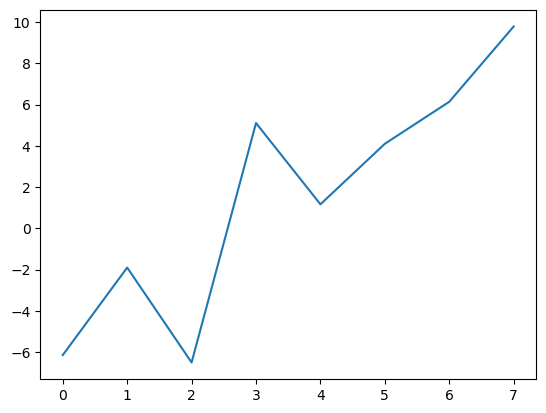

In [98]:
plt.plot(mean_dif_setp)
